# Nx versus T and OA

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_eScience/bs_fdbck_escience/data_info/area_defs.csv


In [3]:

import numpy as np



In [4]:
plot_path = Path('Plots')

In [5]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_{case}_{_x}_{_y}.png'
    return plot_path /f

In [6]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [7]:
import pandas as pd

In [8]:
from bs_fdbck.constants import path_measurement_data

In [11]:
path_measurement_data = Path('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data')

In [12]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [ ]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



#ds_ebas_Nx = get_ebas_dataset_with_Nx()

df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()#x_list = [90,100,110,120])

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:217: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if station is 'ATTO':


Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

In [15]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/var/tmp/ipykernel_60192/2004127510.py:3: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)


,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
0,2012,14.819834,2.286611,485.015920
1,2013,16.061833,2.266324,458.851509
2,2014,18.469334,4.102861,706.239261
3,2015,14.949500,2.167607,499.026618
4,2016,13.959500,1.693031,418.417730
5,2017,13.619333,1.845648,409.297699
6,2018,17.848833,3.366803,770.183131


In [16]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )


df_hyy_1 = df_hyy_1.set_index('date')

In [17]:
df_hyy_1.index = df_hyy_1.index.rename('time') 

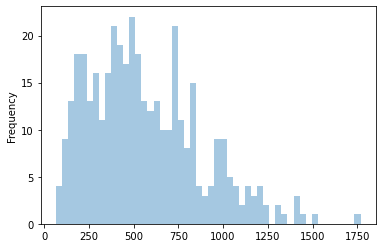

In [18]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:217: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ds = get_ATTO_sizedist_data( path_ebas=path_ebas)


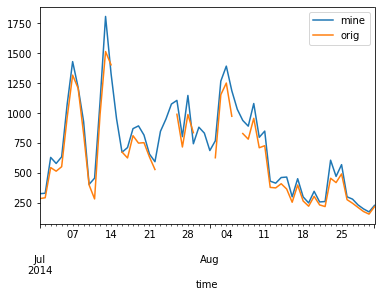

1.13207410632531


In [20]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

# Read in model data:

## Settings:

In [75]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [76]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [77]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [78]:
cases_orig1 = ['OsloAero_intBVOC_f19_f19_mg17_full']
cases_orig2 = ['OsloAero_intBVOC_f19_f19_mg17_ssp245']

In [79]:
case_mod = 'OsloAero_intBVOC_f19_f19_mg17_fssp'

In [80]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-05-04 18:48:10,851 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


2022-05-04 18:48:10,851 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


## Variables

In [81]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [82]:
for case_name in cases_orig1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [83]:
for case_name in cases_orig2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [84]:
dic_ds = dict()
for ca in cases_orig1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

2022-05-04 18:48:11,059 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/OM_AI_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/OM_AC_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/SO4_NA_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/SO4_A1_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/SO4_A2_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_

In [85]:
#dic_ds = dict()
for ca in cases_orig2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-05-04 18:48:11,949 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [86]:
case1 = cases_orig1[0]
case2 = cases_orig2[0]

In [87]:
ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

In [88]:
from_t

'2012-01-01'

In [89]:
st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

In [90]:
print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [91]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

## SELECT STATION:


In [92]:
ds_comb = ds_comb.sel(station='SMR')

In [93]:
dic_ds = dict()
dic_ds[case_mod] = ds_comb

In [94]:
ds_comb.load()

<xarray.Dataset>
Dimensions:   (time: 61345, lev: 32)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables: (12/34)
    ACTREL    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    BC_A      (time, lev) float32 3.611e-13 2.349e-13 ... 1.995e-11 2.124e-11
    BC_AC     (time, lev) float32 2.688e-17 1.224e-17 ... 7.686e-13 2.12e-12
    BC_AI     (time, lev) float32 1.362e-17 7.453e-18 ... 9.578e-13 1.665e-12
    BC_AX     (time, lev) float32 5.203e-14 3.366e-14 ... 3.534e-12 3.429e-12
    BC_N      (time, lev) float32 6.276e-14 3.982e-14 ... 1.845e-11 1.6e-11
    ...        ...
    SOA_LV    (time, lev) float32 1.125e-28 3.214e-28 ... 8.897e-14 1.184e-13
    SOA_NA    (time, lev) float32 1.169e-13 7.966e-14 ... 5.147e-13 6.991e-13
    SS_A1     (time, lev) float32 1.895e-24 3.756e-23 ... 1.337e-11 3.558e-11
    SS_A2     (time, lev) float32 4.764e-26 4.281e-25 ... 5.931e-11 1.57e-10
    SS_A3     (time, lev) float32 2.502e-29 1.686e-28 ... 1.476e-10 3.875e-10
    T         (time, lev) float32 213.2 208.2 193.4 186.4 ... 271.5 272.4 273.3

In [95]:
dic_ds[case_mod]

<xarray.Dataset>
Dimensions:   (time: 61345, lev: 32)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables: (12/34)
    ACTREL    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    BC_A      (time, lev) float32 3.611e-13 2.349e-13 ... 1.995e-11 2.124e-11
    BC_AC     (time, lev) float32 2.688e-17 1.224e-17 ... 7.686e-13 2.12e-12
    BC_AI     (time, lev) float32 1.362e-17 7.453e-18 ... 9.578e-13 1.665e-12
    BC_AX     (time, lev) float32 5.203e-14 3.366e-14 ... 3.534e-12 3.429e-12
    BC_N      (time, lev) float32 6.276e-14 3.982e-14 ... 1.845e-11 1.6e-11
    ...        ...
    SOA_LV    (time, lev) float32 1.125e-28 3.214e-28 ... 8.897e-14 1.184e-13
    SOA_NA    (time, lev) float32 1.169e-13 7.966e-14 ... 5.147e-13 6.991e-13
    SS_A1     (time, lev) float32 1.895e-24 3.756e-23 ... 1.337e-11 3.558e-11
    SS_A2     (time, lev) float32 4.764e-26 4.281e-25 ... 5.931e-11 1.57e-10
    SS_A3     (time, lev) float32 2.502e-29 1.686e-28 ... 1.476e-10 3.875e-10
    T         (time, lev) float32 213.2 208.2 193.4 186.4 ... 271.5 272.4 273.3

# Functions:

In [96]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [97]:
case_mod

'OsloAero_intBVOC_f19_f19_mg17_fssp'

In [98]:


dic_df_sm, dic_df = ds2df_inc_preprocessing(dic_ds, model_lev_i=-1, return_summer_median=True)

SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR
<xarray.Dataset>
Dimensions:   (time: 61345)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
    lev       float64 992.6
Data variables: (12/40)
    ACTREL    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    BC_A      (time) float32 6.432e-11 6.423e-11 ... 2.102e-11 2.124e-11
    BC_AC     (time) float32 6.741e-13 7.021e-13 ... 2.273e-12 2.12e-12
    BC_AI     (time) float32 6.872e-12 6.667e-12 ... 1.619e-12 1.665e-12
    BC_AX     (time) float32 1.514e-11 1.519e-11 ... 4.03e-12 3.429e-12
    BC_N      (time) float32 1.103e-10 1.111e-10 1.13e-10 ... 2.034e-11 1.6e-11
    ...        ...
    rho       (time) float32 1.31 1.307 1.304 1.302 ... 1.283 1.281 1.278 1.275
    T_C       (time) float32 -7.15 -6.538 -6.007 ... -1.176 -0.4713 0.1464
    SOA       (time) float32 0.05822 0.05495 0.05389 ... 0.01367 0.01212 0.01134
    OA        (time) float32 1.555 1.584 1.715 1.724 ... 0.3131

## Merge with observations:

In [99]:
dic_df_pre = dic_df.copy()

In [100]:
for ca in dic_df.keys():
    dic_df[ca] = pd.merge(dic_df_pre[ca], df_hyy_1, right_on='time', left_on='time')
    dic_df[ca]['year'] = dic_df[ca].index.year

In [101]:
dic_df[case_mod]['N50']

time
2012-07-01    1986.001366
2012-07-02    1363.104724
2012-07-03    1516.824991
2012-07-04    2155.595109
2012-07-05    2786.008623
                 ...     
2018-08-27     908.116881
2018-08-28    1389.253115
2018-08-29    1755.988330
2018-08-30    2491.628215
2018-08-31    2481.825634
Name: N50, Length: 434, dtype: float64

In [102]:
df_hyy_1

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3)
time,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471
2012-07-02,2012,7,2,16.753084,1.697459,635.103339
2012-07-03,2012,7,3,17.366917,2.350536,745.212064
2012-07-04,2012,7,4,18.099667,2.118566,734.009356
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450
...,...,...,...,...,...,...
2018-08-27,2018,8,27,12.378417,1.065071,423.684130
2018-08-28,2018,8,28,13.056500,1.517197,513.888488
2018-08-29,2018,8,29,15.028000,2.148551,720.768715


In [103]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'OA (microgram m^-3)','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for c in dic_df.keys():
    
    dic_df[c] = add_log(dic_df[c])
    dic_df_sm[c] = add_log(dic_df_sm[c])
        
df_joint_hyy = add_log(df_joint_hyy)

{'OA', 'N150', 'N100 (cm^-3)', 'OA (microgram m^-3)', 'N50', 'N100', 'N200'}
{'OA', 'N150', 'N50', 'N100', 'N200'}
{'N150', 'N100 (cm^-3)', 'OA (microgram m^-3)', 'N50', 'N100', 'N200'}


In [104]:
ca = case_mod

In [105]:
mask_obs_N = dic_df[ca]['N100 (cm^-3)'].notnull()
mask_obs_OA = dic_df[ca]['OA (microgram m^-3)'].notnull()

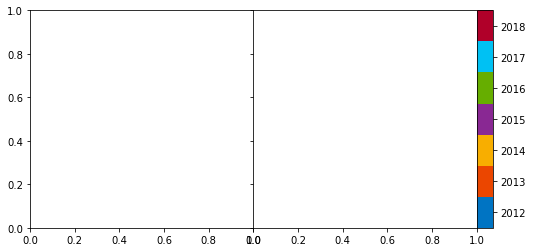

In [106]:
fig, axs, cax = make_cool_grid()

# Plots

## OA,

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.6520689446670725
intercept: [-0.99051845]
slope: [[0.0686396]]
coefficient of determination: 0.6059607238330003
intercept: [-0.64217075]
slope: [[0.06293829]]


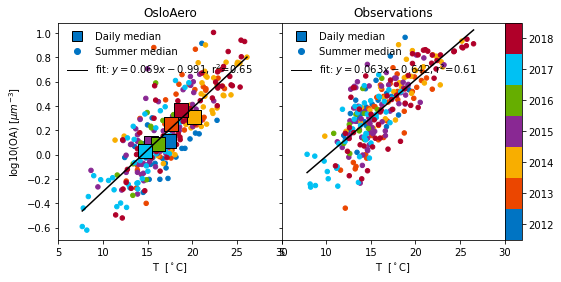

In [107]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid()

v_x = 'T_C'

v_y = 'log10(OA)'
ca = case_mod
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]

ylims = None# [0,5000]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T  [$^\circ$C]'

ylab = r'log10(OA) [$\mu m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')
v_y = 'log10(OA (microgram m^-3))'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.5117772015348118
intercept: [-3.4273787]
slope: [[0.31904736]]
coefficient of determination: 0.63075713228574
intercept: [-3.92871075]
slope: [[0.42275072]]


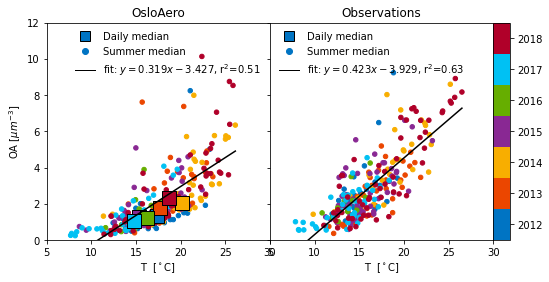

In [109]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid()

v_x = 'T_C'

v_y = 'OA'
ca = case_mod
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]

ylims = [0,12]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T  [$^\circ$C]'

ylab = r'OA [$\mu m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False,
                      legend_loc=1)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')
v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## N50

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.7806864017850196
intercept: [887.47766]
slope: [[509.6253]]
coefficient of determination: 0.24802223387648303
intercept: [960.56345077]
slope: [[138.08958455]]


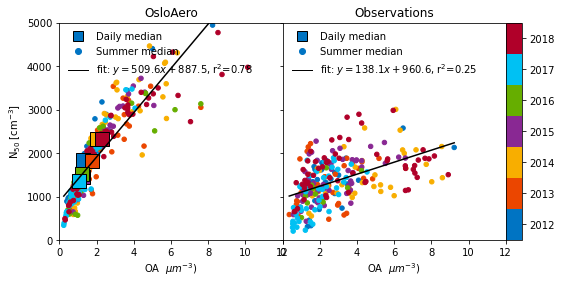

In [182]:

fig, axs, cax = make_cool_grid()
#add_cbar(cax)


v_x = 'OA'

v_y = 'N50'
ca = case_mod
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,5000]
xlab = 'OA  $\mu m^{-3}$)'
ylab = r'log10(OA) [$\mu m^{-3}$]'

ylab = r'OA [$\mu m^{-3}$]'


ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False
                      )
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')


v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2019']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
ax.set_title('Observations')
fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)

plt.show()

In [183]:
fn

PosixPath('Plots/scat_all_years_obs_OsloAero_intBVOC_f19_f19_mg17_fssp_OA _N50.png')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.6638232120009946
intercept: [-1618.7357]
slope: [[205.28627]]
coefficient of determination: 0.31008175952967343
intercept: [-45.3523367]
slope: [[86.71754292]]


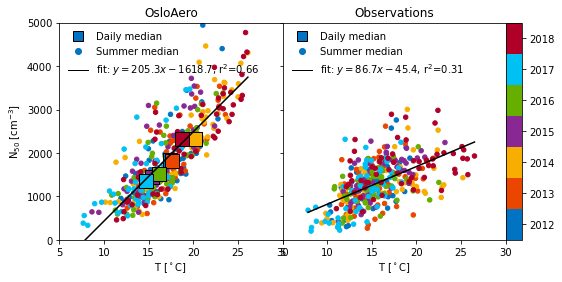

In [184]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid()

v_x = 'T_C'

v_y = 'N50'
ca = case_mod
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]

ylims = [0,5000]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2019']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## Log scale

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.6748215579875021
intercept: [2.3812633]
slope: [[0.04938129]]
coefficient of determination: 0.3164424542335479
intercept: [2.53928403]
slope: [[0.03428313]]


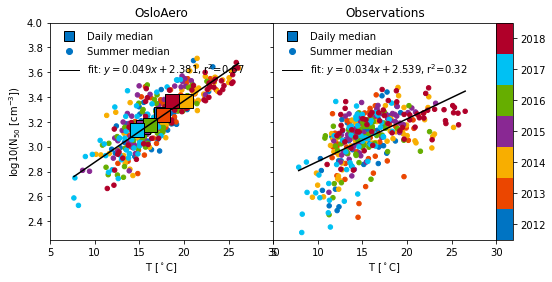

In [185]:
fig, axs, cax = make_cool_grid()
v_x = 'T_C'

v_y = 'log10(N50)'
ca = case_mod
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]

ylims = [2.25,4]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'log10(N$_{50}$ [cm$^{-3}$])'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')

v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab,
                       add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## N100

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.9258209078583152
intercept: [20.989258]
slope: [[269.2238]]
coefficient of determination: 0.7082343927136008
intercept: [207.71769526]
slope: [[158.57421938]]


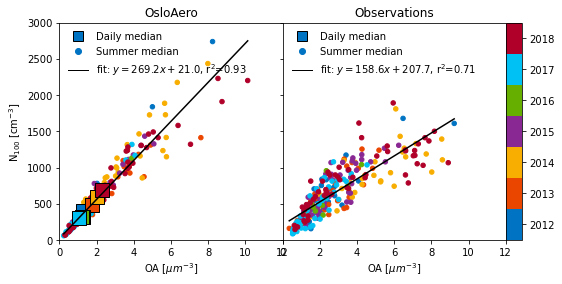

In [187]:
fig, axs, cax = make_cool_grid()
v_x = 'OA'

v_y = 'N100'
ca = case_mod
df_s = dic_df[ca][mask_obs_N&mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,3000]
xlab = 'OA [$\mu m^{-3}$]'

ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, 
                       ylab = ylab,
                      add_cbar=False)
ax.set_title('Observations')


fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.5658974142343183
intercept: [-1018.69855]
slope: [[91.6135]]
coefficient of determination: 0.564837894653111
intercept: [-577.98639962]
slope: [[76.80552741]]


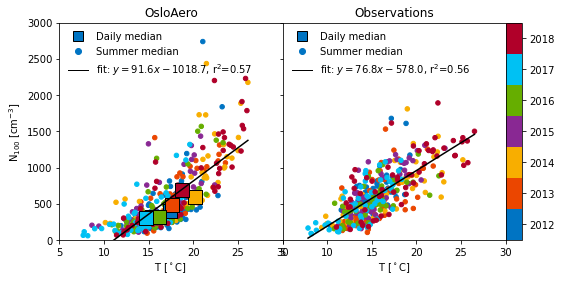

In [174]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid()

v_x = 'T_C'

v_y = 'N100'
ca = case_mod
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]

ylims = [0,3000]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')

v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, 
                       ylab = ylab, 
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## N150

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.9696929616555238
intercept: [-20.47229]
slope: [[83.576706]]
coefficient of determination: 0.8788963929869195
intercept: [29.86499514]
slope: [[105.9345121]]


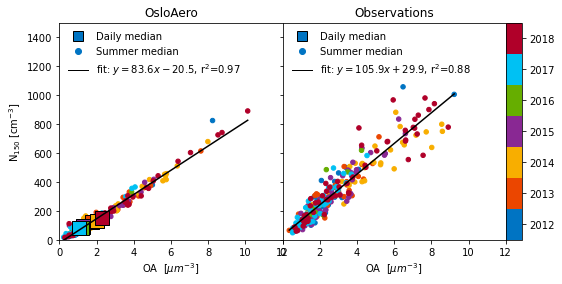

In [188]:

fig, axs, cax = make_cool_grid()

v_x = 'OA'

v_y = 'N150'
ca = case_mod
df_s = dic_df[ca][mask_obs_N & mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,1500]
xlab = 'OA  [$\mu m^{-3}$]'

ylab = r'N$_{150}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.40917234580361983
intercept: [-256.89252]
slope: [[23.41302]]
coefficient of determination: 0.5763617958335139
intercept: [-402.5446256]
slope: [[45.68325893]]


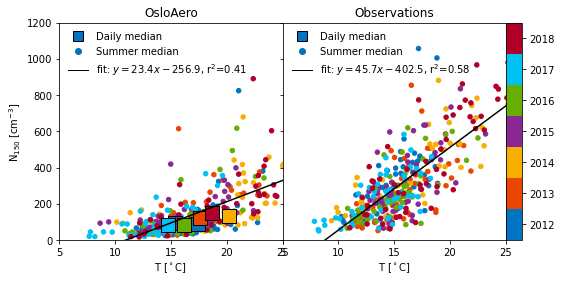

In [176]:
#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid()

v_x = 'T_C'

v_y = 'N150'
ca = case_mod
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,1200]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{150}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, 
                      add_cbar=False)
ax.set_title('Observations')


fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)

plt.show()

## N200

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.8636835920300422
intercept: [-6.7668266]
slope: [[31.579084]]
coefficient of determination: 0.901898162778881
intercept: [-9.11363961]
slope: [[60.5585383]]


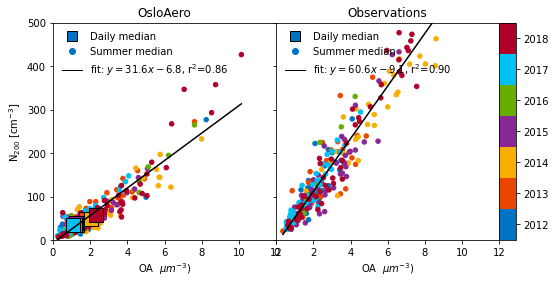

In [192]:

#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid()

v_x = 'OA'

v_y = 'N200'
ca = case_mod
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,500]
xlab = 'OA  $\mu m^{-3}$)'
Xlab = r'OA [$\mu m^{-3}$]'


ylab = r'N$_{200}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, add_cbar=False)
ax.set_title('Observations')


fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.28498677942307804
intercept: [-80.42177]
slope: [[7.924205]]
coefficient of determination: 0.522420974800112
intercept: [-231.93599448]
slope: [[24.71178075]]


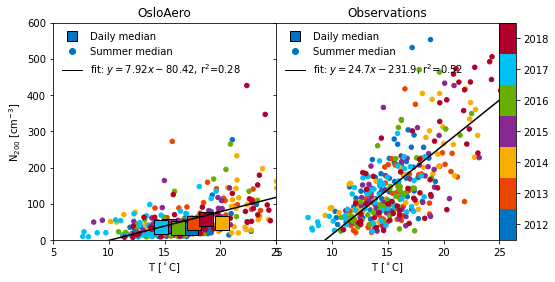

In [178]:
#fig, axs = plt.subplots(1,2, figsize=[12,4], sharey=True,)
fig, axs, cax = make_cool_grid()

v_x = 'T_C'

v_y = 'N200'
ca = case_mod
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,600]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{200}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab, add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero')

v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy#.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[1],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab, add_cbar=False)
ax.set_title('Observations')

fn = make_fn_scat(f'obs_{case_mod}', v_x, v_y)

fig.savefig(fn, dpi=150)


plt.show()

## The end


In [179]:
v_x

'T (degree C)'

In [180]:
v_y

'N200'

In [47]:
import seaborn as sns

Text(0.5, 1.0, 'OBSERVATIONS')

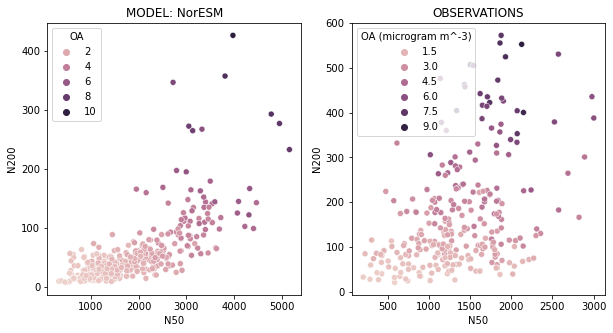

In [57]:
f, axs = plt.subplots(1,2, figsize=[10,5])
sns.scatterplot(
    x='N50',
    y='N200',
    data=dic_df[ca][mask_obs_N],#~df_mod['OA_mid_range']].reset_index(),
    hue='OA',
    ax = axs[0]
    #palette=palette_OA,
)
axs[0].set_title('MODEL: NorESM')

sns.scatterplot(
    x='N50',
    y='N200',
    data=df_joint_hyy,
    hue='OA (microgram m^-3)',
    ax = axs[1],
    #palette=palette_OA,
)
axs[1].set_title('OBSERVATIONS')

#print(len(df[~df['OA_mid_range']]))

Text(0.5, 1.0, 'OBSERVATIONS')

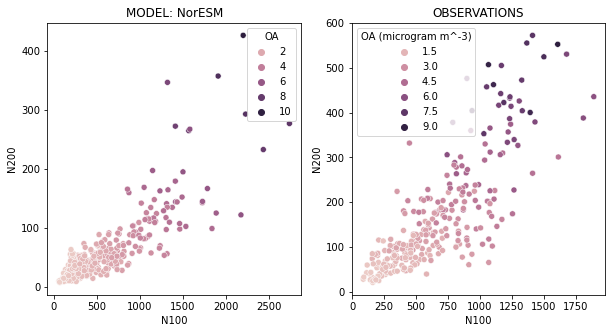

In [56]:
f, axs = plt.subplots(1,2, figsize=[10,5])
sns.scatterplot(
    x='N100',
    y='N200',
    data=dic_df[ca][mask_obs_N],#~df_mod['OA_mid_range']].reset_index(),
    
    hue='OA',
    ax = axs[0]
    #palette=palette_OA,
)
axs[0].set_title('MODEL: NorESM')


sns.scatterplot(
    x='N100',
    y='N200',
    data=df_joint_hyy,
    hue='OA (microgram m^-3)',
    ax = axs[1],
    #palette=palette_OA,
)
axs[1].set_title('OBSERVATIONS')

#print(len(df[~df['OA_mid_range']]))

Text(0.5, 1.0, 'OBSERVATIONS')

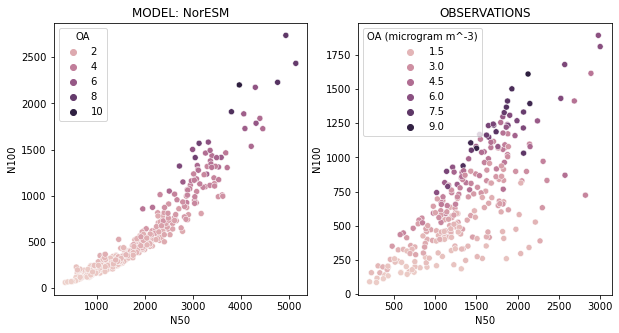

In [58]:
f, axs = plt.subplots(1,2, figsize=[10,5])
sns.scatterplot(
    x='N50',
    y='N100',
    data=dic_df[ca][mask_obs_N],#~df_mod['OA_mid_range']].reset_index(),
    
    hue='OA',
    ax = axs[0]
    #palette=palette_OA,
)
axs[0].set_title('MODEL: NorESM')


sns.scatterplot(
    x='N50',
    y='N100',
    data=df_joint_hyy,
    hue='OA (microgram m^-3)',
    ax = axs[1],
    #palette=palette_OA,
)
axs[1].set_title('OBSERVATIONS')

#print(len(df[~df['OA_mid_range']]))